# **Travelling Salesman Problem :**
The travelling salesman problem (also called the travelling salesperson problem or TSP) asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

In [3]:
import numpy as np

In [4]:
# Load distance matrix from CSV file
distance_matrix = np.loadtxt(open("TSP11.csv", "rb"), delimiter=",")

## **Answer 4:**
The required cost function is:

In [5]:
def cost(tour):
    # Calculate the total distance travelled for a given tour
    distance = 0
    for i in range(len(tour)-1):
        distance += distance_matrix[tour[i], tour[i+1]]
    # Add the distance from the last city back to the first city
    distance += distance_matrix[tour[-1], tour[0]]
    return distance

## **Answer 5:**
The required neighbour function is:

In [6]:
def neighbour(tour):
    # Generate a random neighbouring tour by swapping two consecutive cities
    i = np.random.randint(len(tour)-1)
    new_tour = tour.copy()
    new_tour[i], new_tour[i+1] = new_tour[i+1], new_tour[i]
    return new_tour

In [7]:
def simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature):
    current_state = initial_state
    current_cost = cost(current_state)
    current_temperature = initial_temperature
    best_state = current_state
    best_cost = current_cost
    iteration = 0
    costs = []
    
    while current_temperature > stopping_temperature:
        iteration += 1
        
        # Generate a neighbouring state
        new_state = neighbour(current_state)
        new_cost = cost(new_state)
        
        # Calculate the acceptance probability
        acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)
        
        # Accept the new state with the acceptance probability
        if acceptance_prob > np.random.rand():
            current_state = new_state
            current_cost = new_cost
        
        # Update the best state if necessary
        if current_cost < best_cost:
            best_state = current_state
            best_cost = current_cost
            
        # Add the cost of the current state to the costs list
        costs.append(current_cost)
        
        # Decrease the temperature using the cooling schedule
        current_temperature = current_temperature * cooling_factor
        
    return best_state, best_cost, costs


## **Answer 8:**
The code is implemented below:

In [9]:
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8


best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)


print("Best state:", best_state)
print("Best cost:", best_cost)

Best state: [ 1  0  4  3  2  6  5  9  7  8 10]
Best cost: 313.0


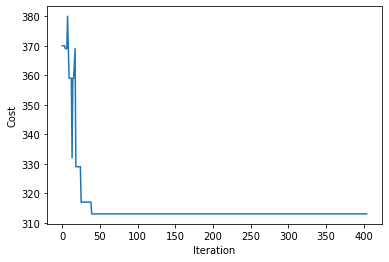

In [10]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

## **Answer 9:**
Another cooling schedule can be of the type: \
$T_{k+1} = T_k - α$

## **Answer 10:**

The same function can be called for the file TS48:

In [11]:
distance_matrix = np.loadtxt(open("TSP48.csv", "rb"), delimiter=",")

In [12]:
initial_state = np.arange(distance_matrix.shape[0])
initial_temperature = 10
cooling_factor = 0.95
stopping_temperature = 1e-8

# Run the simulated annealing algorithm
best_state, best_cost, costs = simulated_annealing(initial_state, initial_temperature, cooling_factor, stopping_temperature)

# Print the best state and cost
print("Best state:", best_state)
print("Best cost:", best_cost)


Best state: [ 0  2  1  3  4  5  6  8  7  9 10 11 12 13 15 14 17 18 16 19 20 22 21 24
 25 23 26 27 30 28 32 29 31 34 33 35 36 37 39 38 41 40 43 42 44 47 46 45]
Best cost: 122940.0


<ipython-input-7-cb3920105120>:18: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-(new_cost - current_cost)/current_temperature)


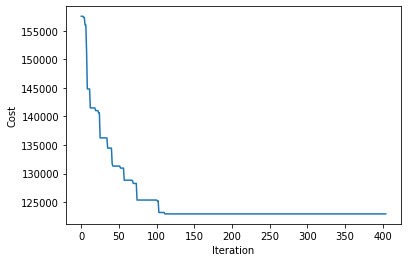

In [13]:
# Plot the cost function for each iteration
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()